In [ ]:
### HALLANDO LA ACULACION DE PUNTOS

In [274]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from random import random
%matplotlib inline

In [275]:
N = 1000   #  UTILIZADO PARA EL NUMERO DE DATOS
L=5     #  NUMERO DE VARIABLES ALEATORIAS DE LA PENDIENTE,INTERCEPTP Y SIGMAS
C=5       # NUMERO DE CAMINADORES
n=1
nu=0
pend=np.array([])
inter=np.array([])
chainB=np.array([])
chainM=np.array([])


Caminador= 1
valor de la pendiente para el caminador 1 es de 1.9651357150595887
valor del intercepto para el caminador 1 es de 0.22752261421080267
Valores de sigma para la pendiente para el caminador 1 es de valor 0.653758331154057
Valores de sigma para el intepto para el caminador 1 es de valor 0.29834369513967396


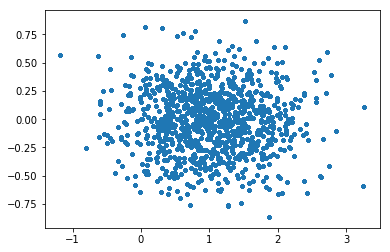

Caminador= 2
valor de la pendiente para el caminador 2 es de 0.399233393192884
valor del intercepto para el caminador 2 es de 1.052699903961741
Valores de sigma para la pendiente para el caminador 2 es de valor 0.7780783544037494
Valores de sigma para el intepto para el caminador 2 es de valor 0.12289122955710263


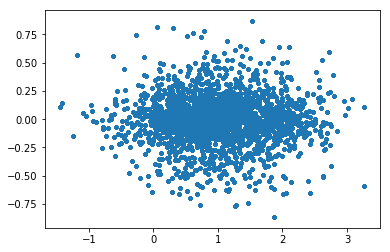

Caminador= 3
valor de la pendiente para el caminador 3 es de 1.2572236921031874
valor del intercepto para el caminador 3 es de 0.6069897969369826
Valores de sigma para la pendiente para el caminador 3 es de valor 0.5626973553869599
Valores de sigma para el intepto para el caminador 3 es de valor 0.5421132795854418


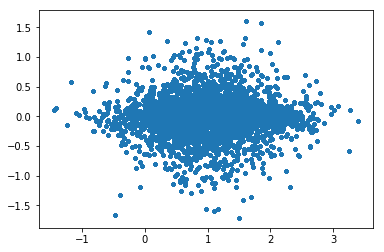

Caminador= 4
valor de la pendiente para el caminador 4 es de 0.2078539477581396
valor del intercepto para el caminador 4 es de 1.7157833090421433
Valores de sigma para la pendiente para el caminador 4 es de valor 0.3426003339035788
Valores de sigma para el intepto para el caminador 4 es de valor 0.36502958446691547


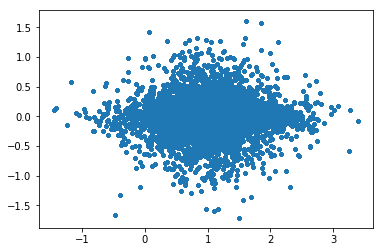

Caminador= 5
valor de la pendiente para el caminador 5 es de 1.9661718224775786
valor del intercepto para el caminador 5 es de 0.5432674533242619
Valores de sigma para la pendiente para el caminador 5 es de valor 0.7288322932606809
Valores de sigma para el intepto para el caminador 5 es de valor 0.6847813139164096


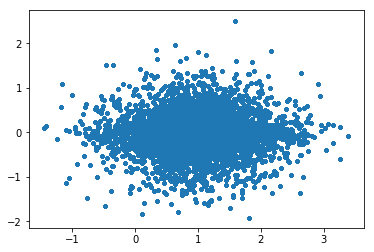

la union de todos los caminadores que son= 5


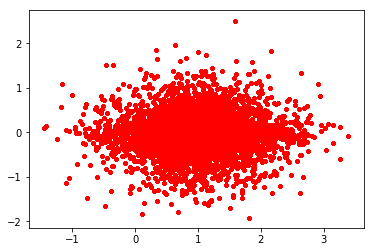

In [276]:
chainB=np.zeros((C*N*N+1,2))
chainM=np.zeros((C*N*N+1,2))
#print(chainB)
while n < C+1: 
  ########primer paso  
  m_ir=np.random.uniform(2,0.1,L)  # ESTE NOS DA L VALORES PARA m_ir 
  m_i =m_ir[2]  #PERO SOLO TOMAREMOS ELVALOR 2
  b_ir=np.random.uniform(2,0.1,L)
  b_i = b_ir[2]
  ############ resultados del primer paso  
  print('Caminador=',n)  
  
  print('valor de la pendiente para el caminador',n,'es de',m_i)
  print('valor del intercepto para el caminador',n,'es de',b_i)
  #plt.subplot(20,3,1)
  #plt.title('Valores para la pendiente inicial')
  #plt.plot(m_ir,'green')
  #plt.subplot(20,3,3)
  #plt.title('Valores para la intercepto inicla inicial')
  #plt.plot(b_ir,'red')
  #######segundo paso
  data = 10*np.random.rand(N)
  #########paso sin resultados solo carga de datos 
  #######tercer paso 
  y = m_i*data+b_i
  yerr = 0.1+0.5*np.random.rand(N)
  #y += np.abs(f_i*y) * np.random.randn(N)
  y += yerr * np.random.randn(N)
  ######## tercer paso sin resultados
  ##########cuarto paso
  def lnlike(theta, x, y, yerr):
      m, b, lnf = theta
      model = m * x + b
      inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
      return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))
  ########paso sin resultados cuarto paso
  ######## Quinto paso
  plist = [0.0,5.0,0.0,5.0]
  ######Quinto paso sin rresutados
  #######SSexto paso
  def lnprior(theta, plist):
    m, b = theta
    if plist[0] < m < plist[1] and plist[2] < b < plist[3]:
        return 0.0
    return -np.inf
  ###########Cierre del Sexto Paso
  ##########Siptimo paso
  sigma_mr =np.random.uniform(0.8,0.01,L) 
  sigma_m = sigma_mr[2]
  sigma_br = np.random.uniform(0.9,0.05,L)#sigma_b = 0.05
  sigma_b =sigma_br[2] 
  #plt.subplot(20,3,5)
  #plt.title('Valores para la sigma_m')
  #plt.plot(sigma_mr,'green')
  #plt.subplot(20,3,7)
  #plt.title('Valores para la sigma_b')
  #plt.plot(sigma_br,'red')
  print('Valores de sigma para la pendiente para el caminador',n,'es de valor', sigma_m)
  print('Valores de sigma para el intepto para el caminador',n,'es de valor',sigma_b)
  #########Cierre del Septimo paso
  ######### Octavo Paso
  m_new = np.random.uniform(m_i,sigma_m,1000)
  #plt.plot(m_new,'black')
  ########Cierre del Octavo Paso
  ########----Noveno Paso
  b_new = np.random.uniform(b_i,sigma_b,1000)
  #plt.plot(b_new,'black')
  #plt.show()
  ########-----Cierre del Noveno Paso
  ########-----Desimo Paso
  def Pasos(theta_i,theta_p):
      if (lnprior(theta_p,theta_p)):
          return theta_i    
      p_i=lnlike(theta_i)
      p_p=lnlike(theta_p)
      p_n=p_p/p_i
      p_n=min(1.,p_n)
      if (p_n==1.):
          return theta_p
      else:
          x=random()
          if (p_n>=x):
              return theta_p
          else:
              return theta_i
      return  
  ########-----Cierre del Desimo Paso 
  ########------Onceavo Paso
  NS = N
  Nc = 10
  theta_in = [1.,0.0]
  c = []
  ########-----Cierre del Onceavo Paso
  ########------Doceavo Paso
  for i in range(N):
      theta_i = np.array([np.random.normal(theta_in[0],sigma_m),np.random.normal(theta_in[1], sigma_b)],)
      for l in range(NS):
          if l==0:
              cadena = theta_i
          else:
              theta_p = np.array([np.random.normal(theta_in[0], sigma_m),np.random.normal(theta_in[1], sigma_b)])
              theta_n = Pasos(theta_i,theta_p)
              cadena = np.concatenate((cadena,theta_n))
              theta_i = theta_n
      if i==0:
          c = cadena
      else:
          c = np.vstack((c,cadena))
  ########-----Cierre del Doceavo Paso 
  ########------Trececeavo Paso
  chain = c[:,:].reshape((-1, 2))
  #print ('Valores de cadena',chain[1,0],chain[1,1],len(chain))
  #print (chain[:,0],chain[:,1]) 
  
  ########-----Cierre del Trececeavo Paso
    
  for j in range(len(chain[:,0])):
      chainB[nu,0]=chain[j,0]
      chainM[nu,1]=chain[j,1]
      #print(nu,chainB[nu,0],chainM[nu,1])
      nu=nu+1 
      nu=nu
      
  #print('valoes de pendiente',chainB,chainM)     
  ########------Catorceavo Paso
  plt.scatter(chainB[:,0],chainM[:,1],s=None, marker='.')
  plt.show() 

  ########-----Cierre del -Catorceavo Paso
    
    
  ############# cierre del while numero de caminadores  
  n+=1
print('la union de todos los caminadores que son=',C)      
plt.scatter(chainB[:,0],chainM[:,1],s=None, marker='.',color='red')
plt.show()
#print('TOTALES',chainB[:,0],chainM[:,1])

In [244]:
### HALLANDO LA ACULACION DE PUNTOS


In [271]:
N = 10   #  UTILIZADO PARA EL NUMERO DE DATOS
L=5     #  NUMERO DE VARIABLES ALEATORIAS DE LA PENDIENTE,INTERCEPTP Y SIGMAS
C=10000       # NUMERO DE CAMINADORES
n=1
nu=0
pend=np.array([])
inter=np.array([])
chainB=np.array([])
chainM=np.array([])


la union de todos los caminadores que son= 10000


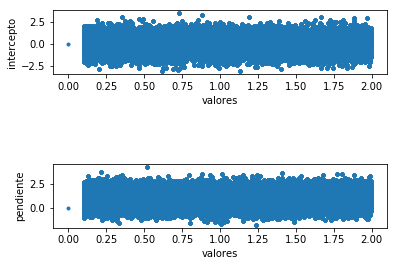

In [273]:
pend=np.zeros((C*N*N+1,2))
inter=np.zeros((C*N*N+1,2))
chainB=np.zeros((C*N*N+1,2))
chainM=np.zeros((C*N*N+1,2))

#print(chainB)
while n < C+1: 
  ########primer paso  
  m_ir=np.random.uniform(2,0.1,L)  # ESTE NOS DA L VALORES PARA m_ir 
  m_i =m_ir[2]  #PERO SOLO TOMAREMOS ELVALOR 2
  b_ir=np.random.uniform(2,0.1,L)
  b_i = b_ir[2]
  ############ resultados del primer paso  
  #print('Caminador=',n)  
  
  #print('valores iniciales de m_i=',m_i)
  #print('valores iniciales de b_i=',b_i)
  #plt.subplot(20,3,1)
  #plt.title('Valores para la pendiente inicial')
  #plt.plot(m_ir,'green')
  #plt.subplot(20,3,3)
  #plt.title('Valores para la intercepto inicla inicial')
  #plt.plot(b_ir,'red')
  #######segundo paso
  data = 10*np.random.rand(N)
  #########paso sin resultados solo carga de datos 
  #######tercer paso 
  y = m_i*data+b_i
  yerr = 0.1+0.5*np.random.rand(N)
  #y += np.abs(f_i*y) * np.random.randn(N)
  y += yerr * np.random.randn(N)
  ######## tercer paso sin resultados
  ##########cuarto paso
  def lnlike(theta, x, y, yerr):
      m, b, lnf = theta
      model = m * x + b
      inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
      return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))
  ########paso sin resultados cuarto paso
  ######## Quinto paso
  plist = [0.0,5.0,0.0,5.0]
  ######Quinto paso sin rresutados
  #######SSexto paso
  def lnprior(theta, plist):
    m, b = theta
    if plist[0] < m < plist[1] and plist[2] < b < plist[3]:
        return 0.0
    return -np.inf
  ###########Cierre del Sexto Paso
  ##########Siptimo paso
  sigma_mr =np.random.uniform(0.8,0.01,L) 
  sigma_m = sigma_mr[2]
  sigma_br = np.random.uniform(0.9,0.05,L)#sigma_b = 0.05
  sigma_b =sigma_br[2] 
  #plt.subplot(20,3,5)
  #plt.title('Valores para la sigma_m')
  #plt.plot(sigma_mr,'green')
  #plt.subplot(20,3,7)
  #plt.title('Valores para la sigma_b')
  #plt.plot(sigma_br,'red')
  #print('Valores de sigma para la pendiente',sigma_m)
  #print('Valores de sigma para el intepto',sigma_b)
  #########Cierre del Septimo paso
  ######### Octavo Paso
  m_new = np.random.uniform(m_i,sigma_m,1000)
  #plt.plot(m_new,'black')
  ########Cierre del Octavo Paso
  ########----Noveno Paso
  b_new = np.random.uniform(b_i,sigma_b,1000)
  #plt.plot(b_new,'black')
  #plt.show()
  ########-----Cierre del Noveno Paso
  ########-----Desimo Paso
  def Pasos(theta_i,theta_p):
      if (lnprior(theta_p,theta_p)):
          return theta_i    
      p_i=lnlike(theta_i)
      p_p=lnlike(theta_p)
      p_n=p_p/p_i
      p_n=min(1.,p_n)
      if (p_n==1.):
          return theta_p
      else:
          x=random()
          if (p_n>=x):
              return theta_p
          else:
              return theta_i
      return  
  ########-----Cierre del Desimo Paso 
  ########------Onceavo Paso
  NS = N
  Nc = 10
  theta_in = [1.,0.0]
  c = []
  ########-----Cierre del Onceavo Paso
  ########------Doceavo Paso
  for i in range(N):
      theta_i = np.array([np.random.normal(theta_in[0],sigma_m),np.random.normal(theta_in[1], sigma_b)],)
      for l in range(NS):
          if l==0:
              cadena = theta_i
          else:
              theta_p = np.array([np.random.normal(theta_in[0], sigma_m),np.random.normal(theta_in[1], sigma_b)])
              theta_n = Pasos(theta_i,theta_p)
              cadena = np.concatenate((cadena,theta_n))
              theta_i = theta_n
      if i==0:
          c = cadena
      else:
          c = np.vstack((c,cadena))
  ########-----Cierre del Doceavo Paso 
  ########------Trececeavo Paso
  chain = c[:,:].reshape((-1, 2))
  #print ('Valores de cadena',chain[1,0],chain[1,1],len(chain))
  #print (chain[:,0],chain[:,1]) 
  
  ########-----Cierre del Trececeavo Paso
    
  for j in range(len(chain[:,0])):
      chainB[nu,0]=chain[j,0]
      chainM[nu,1]=chain[j,1]
      pend[nu,0]=m_i
      inter[nu,1]=b_i
      #print(nu,chainB[nu,0],chainM[nu,1])
      nu=nu+1 
      nu=nu
      
  #print('valoes de pendiente',chainB,chainM)     
  ########------Catorceavo Paso
  #plt.scatter(inter[:,1],chainM[:,1],s=None, marker='.')
  #plt.show() 
  ########-----Cierre del -Catorceavo Paso
  ############# cierre del while numero de caminadores  
  n+=1
print('la union de todos los caminadores que son=',C)      

plt.subplot(3,1,1)
plt.scatter(inter[:,1],chainM[:,1],s=None, marker='.')
plt.ylabel('intercepto')
plt.xlabel('valores')

plt.subplot(3,1,3)
plt.scatter(pend[:,0],chainB[:,0],s=None, marker='.')
plt.ylabel('pendiente')
plt.xlabel('valores')
plt.show()

#print('TOTALES',chainB[:,0],chainM[:,1])